Linear Regression for Supervised Learning

In [13]:
import seaborn as sns

df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# a)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [21]:
df = df.dropna(subset=["horsepower"])

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# b)

In [30]:
# This works same as above because "describe()" only shows numerical values, and not text. So origin and name is not visible either which way we do it.
#Though we will remove acceleration and displacement since it is not needed imo.
df[["mpg", "cylinders", "horsepower", "weight", "model_year"]].describe()



,mpg,cylinders,horsepower,weight,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184,75.979592
std,7.805007,1.705783,38.491160,849.402560,3.683737
min,9.000000,3.000000,46.000000,1613.000000,70.000000
25%,17.000000,4.000000,75.000000,2225.250000,73.000000
50%,22.750000,4.000000,93.500000,2803.500000,76.000000
75%,29.000000,8.000000,126.000000,3614.750000,79.000000
max,46.600000,8.000000,230.000000,5140.000000,82.000000


# c) + d)

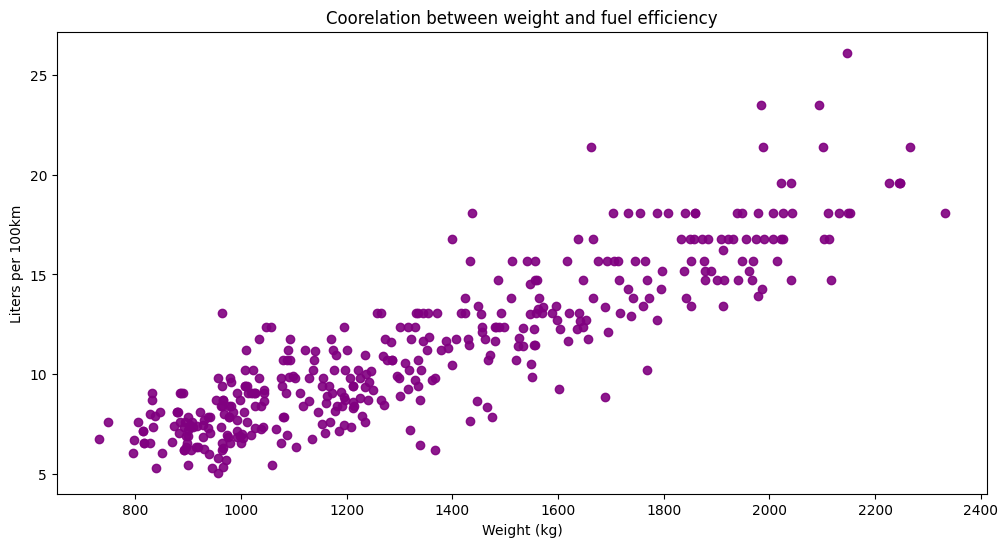

In [33]:
import matplotlib.pyplot as plt

# Konvertera mpg till liter per 100 km
df["l_per_100km"] = 235.214583 / df["mpg"]

# Konvertera vikt från lbs till kg
df["weight_kg"] = df["weight"] * 0.45359237


fig,ax = plt.subplots(figsize=(12, 6))
ax.scatter(df["weight_kg"], df["l_per_100km"], alpha=0.9, color="purple")

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Liters per 100km")
ax.set_title("Coorelation between weight and fuel efficiency")

plt.show()

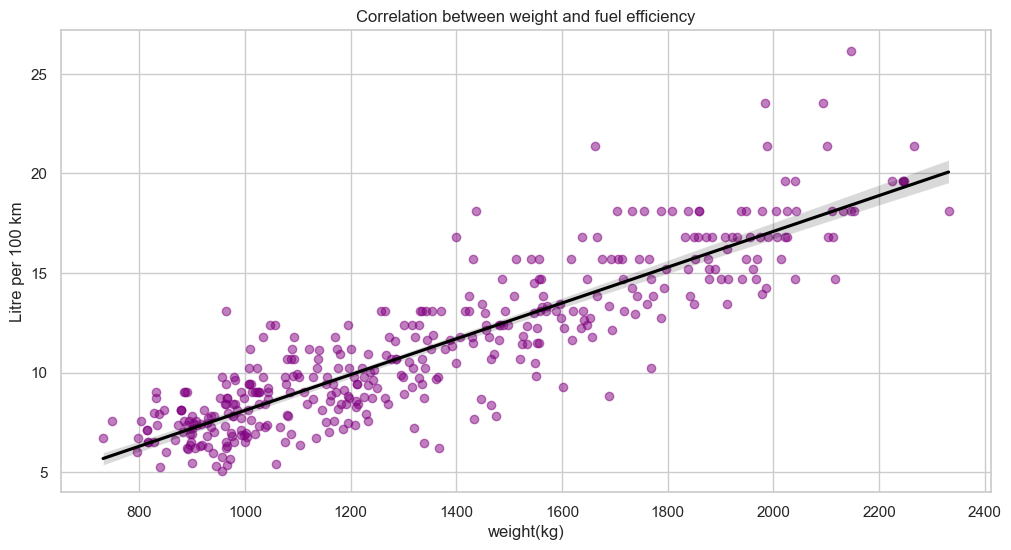

In [34]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.regplot(x="weight_kg", y="l_per_100km", data=df, scatter_kws={"alpha": 0.5, "color": "purple"}, line_kws={"color": "black"})

plt.xlabel("weight(kg)")
plt.ylabel("Litre per 100 km")
plt.title("Correlation between weight and fuel efficiency")
plt.show()